# Regresja wielokrotna

- regresja wielokrotna
- jakość dopasowania

In [ ]:
import numpy as np
import pandas as pd

import statsmodels.api as sm
import statsmodels.formula.api as smf

from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder


import matplotlib.pyplot as plt

In [ ]:
carseats = sm.datasets.get_rdataset(dataname="Carseats", package="ISLR", cache=True)

In [ ]:
carseats_df = carseats.data

In [ ]:
carseats_df = pd.get_dummies(carseats_df,columns = ['ShelveLoc','Urban','US'],drop_first=True)
#one hot encoding w przypadku pandas-a, nie bierzemy kolumny dla bad bo współliniowość, tak samo dla No w Urban i US

In [ ]:
carseats_df

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes
0,9.50,138,73,11,276,120,42,17,False,False,True,True
1,11.22,111,48,16,260,83,65,10,True,False,True,True
2,10.06,113,35,10,269,80,59,12,False,True,True,True
3,7.40,117,100,4,466,97,55,14,False,True,True,True
4,4.15,141,64,3,340,128,38,13,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,True,False,True,True
396,6.14,139,23,3,37,120,55,11,False,True,False,True
397,7.41,162,26,12,368,159,40,18,False,True,True,True
398,5.94,100,79,7,284,95,50,12,False,False,True,True


## Zadanie 1

1. Wyznacz liniową funkcję regresji opisującą zależność sprzedaży (`Sales`) od wysokości budżetu na reklamę (`Advertising`) i ceny (`Price`).


2. Zweryfikuj dopasowanie modelu `Sales ~ Advertising + Price`. Oblicz i zinterpretuj wartość współczynnika determinacji $R^2$.
    
       
3. Wyznacz model liniowy najlepiej opisujący zależność sprzedaży fotelików samochodowych od pozostałych dostępnych zmiennych. Oblicz i zinterpretuj wartość współczynnika determinacji $R^2$.

4. Zweryfikuj dopasowanie modelu `Sales ~ Advertising +Price+ShelveLoc+CompPrice+Income+Age`. Oblicz i zinterpretuj wartość współczynnika determinacji $R^2$.

5. Podaj przewidywaną wartość sprzedaży dla przypadku:  
`pd.DataFrame({
    'Sales': np.NaN,
    'CompPrice': [125.0],
    'Income': [70.0],
    'Advertising': [5.0],
    'Population': [270.0],
    'Price': [120.0],
    'ShelveLoc': ['Medium'],
    'Age': [54.0],
    'Education': [15.0],
    'Urban': ['Yes'],
    'US': ['Yes']
})`

6. Oceń jakość dopasowania.

In [ ]:
X2, y = carseats_df.iloc[:, carseats_df.columns.isin(['Advertising','Price'])], carseats_df['Sales']

In [ ]:
x2 = np.array(X2)
lm2 = LinearRegression()
lm2.fit(x2,y)
lm2.score(x2,y)

0.28185560334302273

In [ ]:
X3 = carseats_df.iloc[:, carseats_df.columns!='Sales']

In [ ]:
X3

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes
0,138,73,11,276,120,42,17,False,False,True,True
1,111,48,16,260,83,65,10,True,False,True,True
2,113,35,10,269,80,59,12,False,True,True,True
3,117,100,4,466,97,55,14,False,True,True,True
4,141,64,3,340,128,38,13,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,33,14,True,False,True,True
396,139,23,3,37,120,55,11,False,True,False,True
397,162,26,12,368,159,40,18,False,True,True,True
398,100,79,7,284,95,50,12,False,False,True,True


In [ ]:
x3 = np.array(X3)
lm3 = LinearRegression()
lm3.fit(x3,y)
lm3.score(x3,y)

0.8734133434127013

In [ ]:
X4 = carseats_df.iloc[:, carseats_df.columns.isin(['Advertising','Price','ShelveLoc_Good',	'ShelveLoc_Medium','CompPrice','Income','Age'])]

In [ ]:
x4 = np.array(X4)
lm4 = LinearRegression()
lm4.fit(x4,y)
lm4.score(x4,y)
#czasem podobne doasowanie przy mniejszej liczbie zmiennych, poprawia czytelność modelu, a także może zapobiegać przeuczeniu

0.871982496884308

In [ ]:
x_new = pd.DataFrame({ 'CompPrice': [125.0], 'Income': [70.0], 'Advertising': [5.0], 'Population': [270.0], 'Price': [120.0],'Age': [54.0],'Education': [15.0], 'ShelveLoc_Good': [False],
                       'ShelveLoc_Medium': [True],  'Urban_Yes': [True], 'US_Yes': [True] })

In [ ]:
lm3.predict(np.array(x_new))

array([6.68993336])

# Graficzna ewaluacja modeli regresji:
- wykres wartości przewidywanych względem prawdziwych
- wykres residuów względem wartości dopasowanych

### Wykres wartości przewidywanych względem prawdziwych

$(y_i, \hat{y}_i)$

wykres wartości przewidywanych względem prawdziwych.

Przy idealnym dopasowaniu, punkty powinny się układać na prostej y=x.

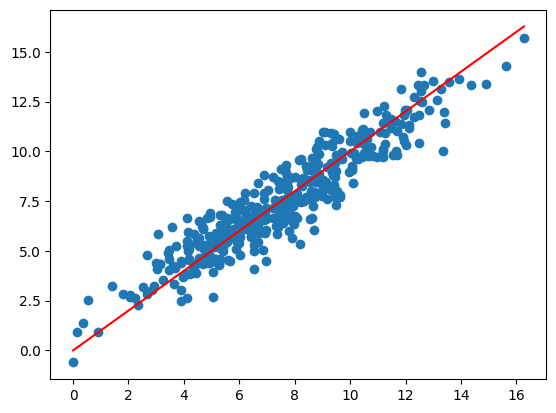

In [ ]:
Ylin = np.linspace(carseats_df['Sales'].min(),carseats_df['Sales'].max(),100)
plt.scatter(carseats.data['Sales'],lm4.predict(x4))
plt.plot(Ylin,Ylin,color = 'red')
plt.show()
#tu jest bardzo dobre dopasowanie

## Wykres rezyduów:

1. $(i,e_i)$,

2. $(\hat{y}_i,e_i)$.

Oba wykresy powinny układać się wokół zera, bo błędy modelu mają średnią 0. Wspólna wariancja powinna się wyrażać tym, że żadna podgrupa punktów nie łapie większego odchylenia od prostej $y=0$

In [ ]:
res = carseats.data['Sales']-lm4.predict(x4)

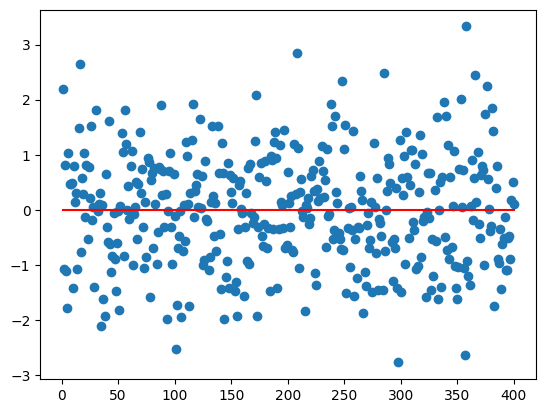

In [ ]:
#1 (i,ei)
xrang = np.arange(1,len(res)+1)
plt.scatter(xrang,res)
plt.plot(xrang,np.repeat(0,len(xrang)),color = 'red')

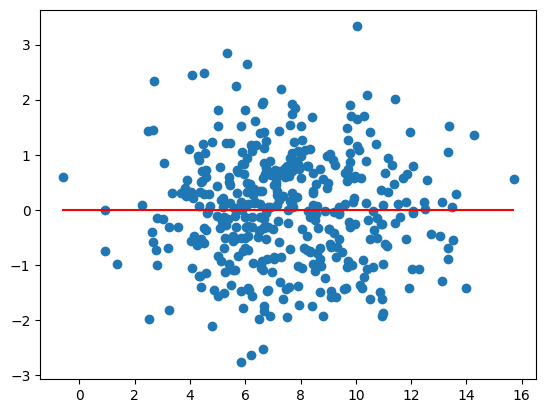

In [ ]:
#2 (\hat{y}_i,ei)
xrang = np.arange(lm4.predict(x4).min(),lm4.predict(x4).max(),0.1)
plt.scatter(lm4.predict(x4),res)
plt.plot(xrang,np.repeat(0,len(xrang)),color = 'red')
#tu obydwa wykresy są ok

### Wykres kwantylowy dla reszt

Do badania normalności błędów

(reszty teoretyczne vs. reszty empiryczne)

Wykres powinnien układać sie na prostej $y=x$.

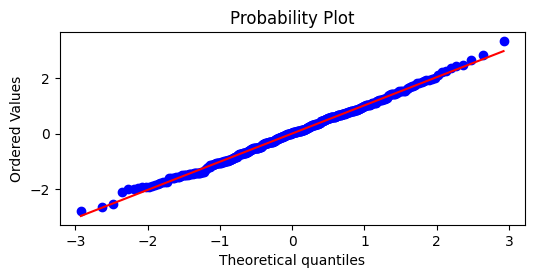

In [ ]:
import scipy as sp
fig,ax = plt.subplots(figsize=(6,2.5))
sp.stats.probplot(res,plot = ax,dist = 'norm',fit = True)
plt.show()

# Zadanie 2

1. Wczytać dane `realest.csv`, które zawierają informacje na temat domów na przedmieściach Chicago: cena domu (`Price`), liczba sypialni (`Bedroom`), powierzchnia w stopach kwadratowych (`Space`), liczba pokoi (`Room`), szerokość frontu działki w stopach (`Lot`), roczny podatek od nieruchomości (`Tax`), liczba łazienek (`Bathroom`), liczba miejsc parkingowych w garażu (`Garage`) i stan domu (`Condition`, 0-dobry, 1-wymaga remontu).
       
2. Jaki wpływ na cenę ma zwiększenie liczby sypialni o 1,
 kiedy wartości wszystkich pozostałych zmiennych objaśniających są ustalone?
 Znaleźć uzasadnienie tego pozornie błędnego wyniku. Porównać ten wynik  z wynikiem otrzymanym dla modelu linowego opisującego zależność ceny domu jedynie od liczby sypialni.  

3. Podaj przewidywaną wartość sprzedaży dla przypadku:  
`pd.DataFrame({
    'Price': np.NaN,
    'Bedroom': [3.0],
    'Space': [1100],
    'Room': [6.0],
    'Lot': [32.0],
    'Tax': [911.0],
    'Bathroom': [1.5],
    'Garage': [1.0],
    'Condition': [0.0]
})`

4. Oceń jakość dopasowania.

In [ ]:
#1
realest = pd.read_csv('realest.csv')
print(realest)
#są Na wyrzućmy je
realest = realest.dropna(axis =0)
print(realest)

     Price  Bedroom   Space  Room   Lot     Tax  Bathroom  Garage  Condition
0     53.0      2.0   967.0   5.0  39.0   652.0       1.5     0.0        0.0
1     55.0      2.0   815.0   5.0  33.0  1000.0       1.0     2.0        1.0
2     56.0      3.0   900.0   5.0  35.0   897.0       1.5     1.0        0.0
3     58.0      3.0  1007.0   6.0  24.0   964.0       1.5     2.0        0.0
4     64.0      3.0  1100.0   7.0  50.0  1099.0       1.5     1.5        0.0
..     ...      ...     ...   ...   ...     ...       ...     ...        ...
152   44.0      3.0   820.0   5.0  27.0     NaN       1.0     0.0        1.0
153   43.0      2.0   593.0   4.0  30.0   465.0       2.0     1.0        0.0
154   53.0      3.0   716.0   6.0  30.0   585.0       1.0     2.0        1.0
155   62.0      4.0   951.0   7.0  30.0   895.0       2.0     1.0        0.0
156    NaN      NaN     NaN   NaN   NaN     NaN       NaN     NaN        NaN

[157 rows x 9 columns]
     Price  Bedroom   Space  Room   Lot     Tax  Bat

In [ ]:
realest.shape

(128, 9)

In [ ]:
#2
#model
X,y = realest.iloc[:, realest.columns!='Price'],realest['Price']

In [ ]:
X

,Bedroom,Space,Room,Lot,Tax,Bathroom,Garage,Condition
0,2.0,967.0,5.0,39.0,652.0,1.5,0.0,0.0
1,2.0,815.0,5.0,33.0,1000.0,1.0,2.0,1.0
2,3.0,900.0,5.0,35.0,897.0,1.5,1.0,0.0
3,3.0,1007.0,6.0,24.0,964.0,1.5,2.0,0.0
4,3.0,1100.0,7.0,50.0,1099.0,1.5,1.5,0.0
...,...,...,...,...,...,...,...,...
149,4.0,1065.0,7.0,25.0,492.0,1.5,0.0,0.0
151,3.0,585.0,5.0,50.0,713.0,1.0,0.0,0.0
153,2.0,593.0,4.0,30.0,465.0,2.0,1.0,0.0
154,3.0,716.0,6.0,30.0,585.0,1.0,2.0,1.0


In [ ]:
lm = LinearRegression()
lm.fit(np.array(X),y)
lm.score(np.array(X),y)

0.7181656659650734

In [ ]:
#3
print(lm.coef_)
#im więcej sypialni tym mniejsza cena. Dlaczego? Jest to spowodowane tym, że reszta zmiennych
#jest ustalona. Lepiej mieć dom o ustalonej powierzchni z mniejszą liczbą pomieszczeń
#niż dom o tej samej powierzchni z większą ilością pomieszczeń

[-3.16023874e+00  9.66322780e-03  1.68895111e+00  2.36213231e-01
  4.41271852e-03  6.37578599e+00  4.14475743e+00  1.83579537e+00]


In [ ]:
#Potwierdzenie
X2 = realest.iloc[:, realest.columns=='Bedroom']
lm2 = LinearRegression()
lm2.fit(np.array(X2),y)
print(lm2.coef_)
#tym razem Bedroom ma dodatni współczynnik, im większa liczba sypialni
#tym większa cena (i prawdopodobnie wówczas tym większa powierzchnia domu)

[3.08402374]


In [ ]:
#4
#wracamy do modelu pełnego
newdata = pd.DataFrame({
    'Bedroom': [3.0],
    'Space': [1100.0],
    'Room': [6.0],
    'Lot': [32.0],
    'Tax': [911.0],
    'Bathroom': [1.5],
    'Garage': [1.0],
    'Condition': [0.0]
})

print(lm.predict(np.array(newdata)))

[56.56325512]


In [ ]:
res = y-lm.predict(np.array(X))

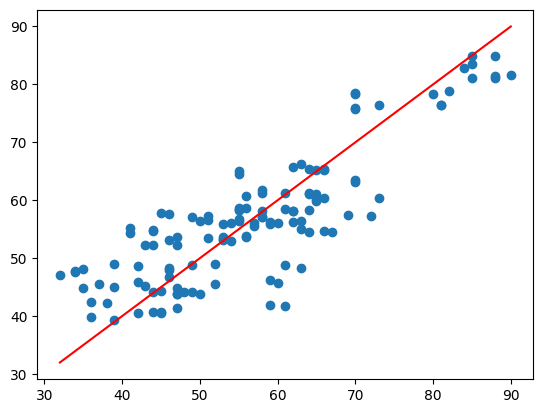

In [ ]:
#5
#wykres prawdziwych wartości w zależności od dopasowanych
Ylin = np.linspace(realest['Price'].min(),realest['Price'].max(),100)
plt.scatter(np.array(realest['Price'])[~np.isnan(realest['Price'])],lm.predict(np.array(X)))
plt.plot(Ylin,Ylin,color = 'red')
plt.show()
#tu jest dosyć dobre dopasowanie

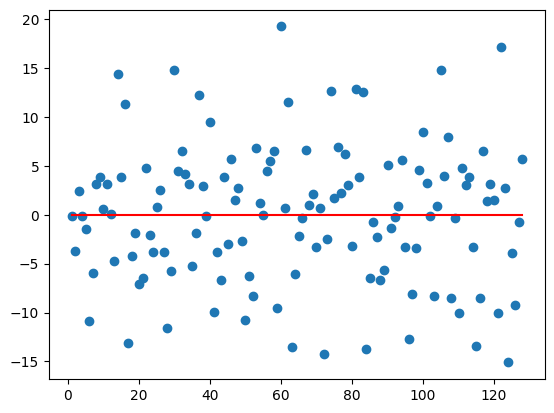

In [ ]:
#rezydua vs indeks obserwacji
xrang = np.arange(1,len(res)+1)
plt.scatter(xrang,res)
plt.plot(xrang,np.repeat(0,len(xrang)),color = 'red')
#układają się równomiernie wokół 0

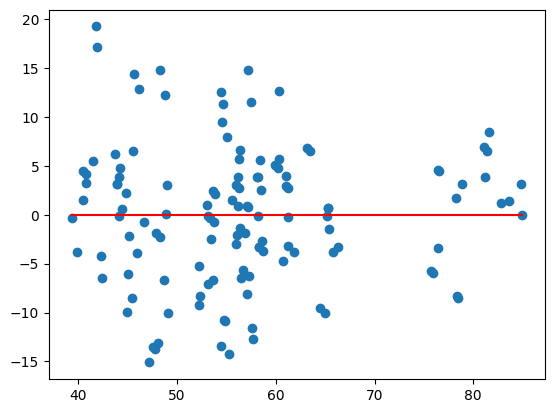

In [ ]:
#rezydua vs dopasowana wartość
plt.scatter(lm.predict(np.array(X)), res)
xrange = np.arange(lm.predict(np.array(X)).min(), lm.predict(np.array(X)).max(), 0.1)
plt.plot(xrange, np.repeat(0, len(xrange)), color='red')

plt.show()
#układają się równomiernie wokół 0 co ciekawe nie ma domów o cenie około 70,
#są albo droższe albo tańsze

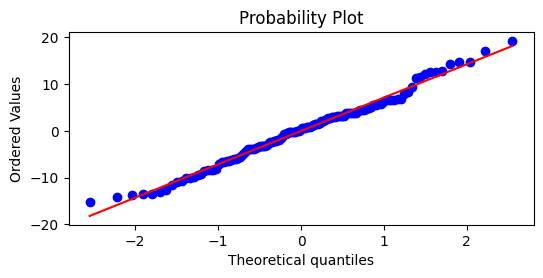

In [ ]:
import scipy as sp
fig,ax = plt.subplots(figsize=(6,2.5))
sp.stats.probplot(res,plot = ax,dist = 'norm',fit = True)
plt.show()
#mamy normalność